<a href="https://colab.research.google.com/github/E56n/ADHA/blob/main/modelado_matematico_de_pasajeros_aereos_1949_1960.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelado Exponencial del Crecimiento de Pasajeros en Aerolíneas Internacionales (1949–1960)

### Objetivo:
Analizar y modelar la tendencia de crecimiento en el número de pasajeros de aerolíneas internacionales entre 1949 y 1960, utilizando un modelo matemático exponencial para ajustar los datos históricos disponibles.

### Fuente de datos:

*   https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv




## Análisis y Determinación de los parametros

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt(url, delimiter=',',skip_header=1, usecols=1)

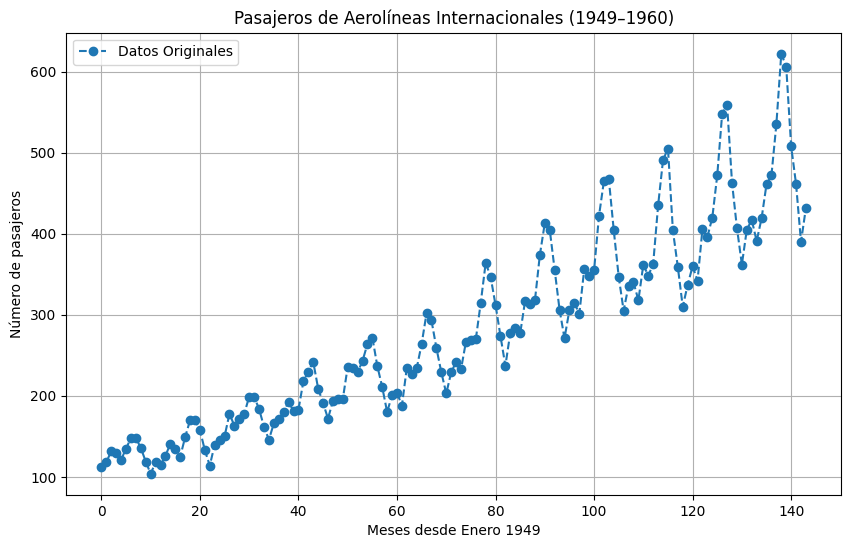

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Datos Originales', linestyle='--', marker='o')
plt.title('Pasajeros de Aerolíneas Internacionales (1949–1960)')
plt.xlabel('Meses desde Enero 1949')
plt.ylabel('Número de pasajeros')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
log_data = np.log(data)
x = np.arange(1, len(data) + 1)
X = np.column_stack((np.ones(len(x)), x))

In [28]:
X_pinv = np.linalg.pinv(X)
params = np.dot(X_pinv, log_data)
print(params)

[4.81366828 0.01004838]


In [29]:
from logging import log
log_A = params[0]
B = params[1]
A = np.exp(log_A)

# 📈 Modelo Exponencial: $y = Ae^{Bx}$

## 🎯 Definición General

La ecuación exponencial general tiene la forma:

$$y = A \cdot e^{B \cdot x}$$

Donde:
- **$y$**: Variable dependiente (salida)
- **$x$**: Variable independiente (entrada)
- **$A$**: Coeficiente inicial (valor cuando $x = 0$)
- **$B$**: Tasa de crecimiento/decrecimiento
- **$e$**: Número de Euler ($e \approx 2.71828...$)

---

## 🔍 Significado de los Parámetros

### **Parámetro A**
- Representa el **valor inicial** cuando $x = 0$
- Determina la **intersección con el eje Y**
- Siempre: $y(0) = A \cdot e^{B \cdot 0} = A \cdot 1 = A$

### **Parámetro B**
- Controla la **tasa de cambio**
- **$B > 0$**: Crecimiento exponencial
- **$B < 0$**: Decrecimiento exponencial
- **$B = 0$**: Función constante ($y = A$)
- $|B|$ mayor → cambio más rápido

---

## 📊 Comportamiento según el valor de B

### 🚀 **Crecimiento Exponencial ($B > 0$)**
$$y = A \cdot e^{B \cdot x} \quad \text{donde } B > 0$$

- La función **crece sin límite**
- Crece más rápido conforme $x$ aumenta
- Ejemplos: población, interés compuesto, viral spread

### 📉 **Decrecimiento Exponencial ($B < 0$)**
$$y = A \cdot e^{-|B| \cdot x} \quad \text{donde } B < 0$$

- La función **decrece hacia 0**
- Nunca llega a ser negativa
- Ejemplos: decaimiento radioactivo, depreciación, enfriamiento

---

## 🎨 Características Gráficas

### Propiedades Generales:
1. **Dominio**: $\mathbb{R} = (-\infty, +\infty)$
2. **Rango**:
   - Si $A > 0$: $(0, +\infty)$
   - Si $A < 0$: $(-\infty, 0)$
3. **Asíntota horizontal**: $y = 0$ (cuando $B < 0$)
4. **Nunca cruza el eje X** (si $A \neq 0$)
5. **Es continua y derivable** en todo su dominio


---

## 🧮 Formas Alternativas

### 1. **Base general**
$$y = A \cdot b^x \quad \text{donde } b = e^B$$

### 2. **Con desplazamiento vertical**
$$y = A \cdot e^{B \cdot x} + C$$
- $C$: desplazamiento vertical
- Nueva asíntota: $y = C$

### 3. **Con desplazamiento horizontal**
$$y = A \cdot e^{B \cdot (x-h)}$$
- $h$: desplazamiento horizontal

---

## 💡 Aplicaciones Prácticas

### 💰 **1. Finanzas - Interés Continuo**
$$M = P \cdot e^{r \cdot t}$$

- $M$: Monto final
- $P$: Principal
- $r$: Tasa de interés
- $t$: Tiempo

Ejemplo: $\$1000$ al $5\%$ anual durante $10$ años
$$M = 1000 \cdot e^{0.05 \cdot 10} = 1000 \cdot e^{0.5} \approx \$1,648.72$$

### 🧬 **2. Biología - Crecimiento Poblacional**
$$P(t) = P_0 \cdot e^{k \cdot t}$$

- $P_0$: Población inicial
- $k$: Tasa de crecimiento
- $t$: Tiempo

### ☢️ **3. Física - Decaimiento Radioactivo**
$$N(t) = N_0 \cdot e^{-\lambda \cdot t}$$

- $N_0$: Cantidad inicial
- $\lambda$: Constante de decaimiento
- $t$: Tiempo

### 🌡️ **4. Ley de Enfriamiento de Newton**
$$T(t) = T_a + (T_0 - T_a) \cdot e^{-k \cdot t}$$

- $T_a$: Temperatura ambiente
- $T_0$: Temperatura inicial
- $k$: Constante de enfriamiento

---

## 📐 Determinación de Parámetros

### Método 1: **Dos puntos conocidos**
Dados $(x_1, y_1)$ y $(x_2, y_2)$:

1. Dividir las ecuaciones:
$$\frac{y_2}{y_1} = e^{B \cdot (x_2-x_1)}$$

2. Resolver para $B$:
$$B = \frac{\ln(y_2/y_1)}{x_2-x_1}$$

3. Encontrar $A$:
$$A = \frac{y_1}{e^{B \cdot x_1}}$$

### Método 2: **Regresión lineal (linearización)**
Aplicar logaritmo natural:
$$\ln(y) = \ln(A) + B \cdot x$$

Esto es una recta con:
- Pendiente = $B$
- Intercepto = $\ln(A)$

---

## 📊 Comparación con Otros Modelos

| Modelo | Ecuación | Crecimiento | Uso típico |
|--------|----------|-------------|------------|
| **Lineal** | $y = mx + b$ | Constante | Relaciones proporcionales |
| **Exponencial** | $y = Ae^{Bx}$ | Acelerado | Poblaciones, finanzas |
| **Logarítmico** | $y = A\ln(x) + B$ | Desacelerado | Aprendizaje, saturación |
| **Potencial** | $y = Ax^B$ | Variable | Leyes físicas |

---

## ⚡ Propiedades Matemáticas Importantes

### 1. **Derivada**
$$\frac{dy}{dx} = B \cdot A \cdot e^{B \cdot x} = B \cdot y$$

La tasa de cambio es proporcional al valor actual

### 2. **Integral**
$$\int A \cdot e^{B \cdot x} \, dx = \frac{A}{B} \cdot e^{B \cdot x} + C$$

### 3. **Tiempo de duplicación** (si $B > 0$)
$$t_{dup} = \frac{\ln(2)}{B}$$

### 4. **Vida media** (si $B < 0$)
$$t_{1/2} = \frac{\ln(2)}{|B|}$$

---

## 🎯 Resumen Clave

1. **$y = Ae^{Bx}$** es el modelo de cambio proporcional
2. **$A$** = valor inicial (cuando $x = 0$)
3. **$B > 0$** → crecimiento, **$B < 0$** → decrecimiento
4. La función **nunca es cero** ni negativa (si $A > 0$)
5. Crece/decrece **más rápido** que cualquier polinomio
6. Se lineariza con **logaritmo natural**
7. Aplicaciones en **finanzas, biología, física, química**

---

## 🔥 Tip para Recordar

> "La exponencial es la función donde **la tasa de cambio es proporcional al valor actual**"

Si algo crece/decrece a una tasa porcentual constante → **¡Usa el modelo exponencial!**

$$\boxed{\frac{dy}{dx} = B \cdot y}$$

Ecuación del modelo obtenida es $y = e^{log(A)} \cdot e^{Bt} = Ae^{Bt}$

## Presentación de Resultados

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE: Error Medio Absoluto
mae = mean_absolute_error(data, fitted_values)

# MSE: Error Cuadrático Medio
mse = mean_squared_error(data, fitted_values)

print(f"Error Medio Absoluto (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")


Error Medio Absoluto (MAE): 33.31
Error Cuadrático Medio (MSE): 2093.96


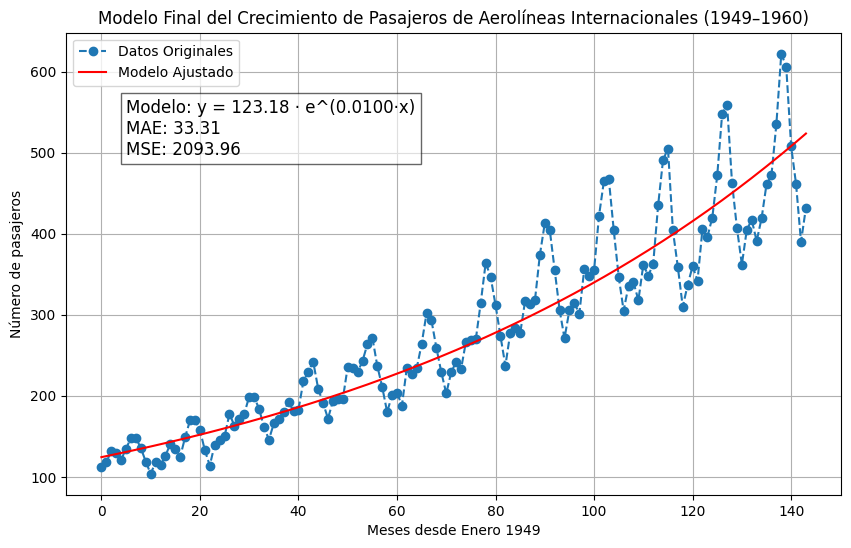

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular errores
mae = mean_absolute_error(data, fitted_values)
mse = mean_squared_error(data, fitted_values)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(data, label='Datos Originales', linestyle='--', marker='o')
plt.plot(fitted_values, label='Modelo Ajustado', color='red')

# Título y etiquetas
plt.title('Modelo Final del Crecimiento de Pasajeros de Aerolíneas Internacionales (1949–1960)')
plt.xlabel('Meses desde Enero 1949')
plt.ylabel('Número de pasajeros')
plt.grid(True)
plt.legend()

# Agregar ecuación y errores al gráfico
equation_text = (
    f"Modelo: y = {A:.2f} · e^({B:.4f}·x)\n"
    f"MAE: {mae:.2f}\n"
    f"MSE: {mse:.2f}"
)
plt.text(5, max(data)*0.8, equation_text, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.6))

plt.show()